# Two Resonators + TLS's + Paramp simulation Partial trace calculation

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import *
import numpy as np

In [2]:
from IPython.display import HTML

In [3]:
from matplotlib import animation
import matplotlib.font_manager

In [4]:
from qutip import *
import scipy.linalg as la
from qutip.piqs import *
import matplotlib.cm as cm
import cv2
import os
import glob
from skimage.io import imread
import re

In [5]:
from matplotlib import pyplot, animation
from mpl_toolkits.mplot3d import Axes3D

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

In [7]:
from PIL import Image

## Functions for plotting

We start by defining some function for visualizing the dynamics. We'll use these further down in the notebook. 

In [8]:
def plot_expect_with_variance(N, op_list, op_title, states):
    """
    Plot the expectation value of an operator (list of operators)
    with an envelope that describes the operators variance.
    """
    
    fig, axes = plt.subplots(1, len(op_list), figsize=(14,3))

    for idx, op in enumerate(op_list):
        
        e_op = expect(op, states)
        v_op = variance(op, states)

        axes[idx].fill_between(tlist, e_op - sqrt(v_op), e_op + sqrt(v_op), color="red", alpha=0.5);
        axes[idx].plot(tlist, e_op)
        axes[idx].set_xlabel('Time')
        axes[idx].set_title(op_title[idx])
        axes[idx].set_xlim(0, max(tlist))

    return fig, axes

In [9]:
def plot_wigner(rho, fig=None, ax=None):
    """
    Plot the Wigner function and the Fock state distribution given a density matrix for
    a harmonic oscillator mode.
    """
    
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8,8))

    if isket(rho):
        rho = ket2dm(rho)
    
    xvec = linspace(-7.5,7.5,200)

    W = wigner(rho, xvec, xvec)
    wlim = abs(W).max()

    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-wlim,wlim), cmap=mpl.cm.get_cmap('RdBu'))
    ax.set_xlabel(r'$x_1$', fontsize=16)
    ax.set_ylabel(r'$x_2$', fontsize=16)

    return fig, ax

In [10]:
def plot_wigner_2d_3d(psi):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = plt.figure(figsize=(17, 8))
    
    ax = fig.add_subplot(1, 2, 1)
    plot_wigner(psi, fig=fig, ax=ax);

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    plot_wigner(psi, fig=fig, ax=ax);
    
    plt.close(fig)
    return fig

In [11]:
def plot_fock_distribution_vs_time(tlist, states, fig=None, ax=None):
    
    Z = zeros((len(tlist), states[0].shape[0]))
    
    for state_idx, state in enumerate(states):
        Z[state_idx,:] = real(ket2dm(state).diag())
        
    if fig is None or axes is None:
        fig, ax = plt.subplots(1, 1, figsize=(8,6))

    Y, X = meshgrid(tlist, range(states[0].shape[0]))
    p = ax.pcolor(X, Y, Z.T, norm=mpl.colors.Normalize(0, 0.5), cmap=mpl.cm.get_cmap('rainbow'), edgecolors='k')
    ax.set_xlabel(r'$N$', fontsize=16)
    ax.set_ylabel(r'$t$', fontsize=16)    
    
    cb = fig.colorbar(p)
    cb.set_label('Probability')
    
    return fig, ax

In [12]:
#We need this for codec and visualization of time dynamics

from base64 import b64encode

def display_embedded_video(filename):
    video = open(filename, "rb").read()
    video_encoded = b64encode(video).decode("ascii")
    video_tag = '<video controls alt="test" src="data:video/x-m4v;base64,{0}">'.format(video_encoded)
    return HTML(video_tag)

In [13]:
def density_Matrix(phiInitFull):
    return np.kron(phiInitFull, conjugate(phiInitFull)).reshape(size(phiInitFull),size(phiInitFull))

def Partial_Entropy(Vector):
    RHO = density_Matrix(Vector)
    #print(RHO)
    Reduced_matrix = [[RHO[0][0]+RHO[1][1], RHO[0][2]+RHO[1][3]], [RHO[2][0]+RHO[3][1], RHO[2][2]+RHO[3][3]]]
    #print(Reduced_matrix)
    eigvals, eigvecs = la.eig(Reduced_matrix)
    eigvals = real(eigvals)
    nzvals = eigvals[eigvals != 0]
    #print(nzvals)
    logvals = []
    for i in nzvals:
        #print(i)
        logvals.append(log(sqrt(i**2)))
    #print(logvals)
    T = float(real(-sum(nzvals * logvals)))
    return T

def Partial_Entropy_M(RHO):
    #print(RHO)
    Reduced_matrix = [[RHO[0][0]+RHO[1][1], RHO[0][2]+RHO[1][3]], [RHO[2][0]+RHO[3][1], RHO[2][2]+RHO[3][3]]]
    #print(Reduced_matrix)
    eigvals, eigvecs = la.eig(Reduced_matrix)
    eigvals = real(eigvals)
    nzvals = eigvals[eigvals != 0]
    #print(nzvals)
    logvals = []
    for i in nzvals:
        #print(i)
        logvals.append(log(sqrt(i**2)))
    #print(logvals)
    T = float(real(-sum(nzvals * logvals)))
    return T

In [14]:
lbls_list = [["u", "d"], ["u", "d"]]
xlabels = []

for inds in tomography._index_permutations([len(lbls) for lbls in lbls_list]):
    xlabels.append("".join([lbls_list[k][inds[k]]
                            for k in range(len(lbls_list))])) 

In [15]:
def matrix_visualize(matrix):
    # visualize H
    lbls_list = [["u", "d"], ["u", "d"]]
    xlabels = []

    for inds in tomography._index_permutations([len(lbls) for lbls in lbls_list]):
         xlabels.append("".join([lbls_list[k][inds[k]]
                            for k in range(len(lbls_list))])) 
        
    fig, ax = matrix_histogram(matrix, xlabels, xlabels, limits=[-1,1])
    #fig, ax = matrix_histogram(matrix)
    ax.view_init(azim=-55, elev=45)
    fig.set_size_inches(5, 5)
    plt.show()

In [16]:
def matrix_chop(matrix):
    T = []
    for i in matrix:
        T.append(chop(i))
    return np.array(T)
def chop(expr, *, max=0.01):
    return [np.round(i,3) if abs(i) > max else 0 for i in expr]

## Introduction

The effective Hamiltonian:

$\displaystyle H = \hbar \Delta_1(a^{\dagger}_1a_1+\frac{1}{2}) +  \frac{\hbar}{2} w_{q1} * \sigma_z + \chi * (a_1^{\dagger}a_1 + 1/2) * \sigma_z + \\
~~~~~~~~~\hbar \Delta_2(a^{\dagger}_2a_2+\frac{1}{2}) +  \frac{\hbar}{2} w_{q2} * \sigma_z + \chi * (a_2^{\dagger}a_2 + 1/2) * \sigma_z- \frac{\hbar}{2}p (a^2+a^{\dagger2})$

where $\Delta_{1,2}$ - is the detuning of the oscillator eigenfrequency from the half of pump frequency, $\chi$ - is the dispersive shifts, $w_{q1,2}$ - qubits frequencies in RWA, $p$- is the parametric pump

## Parameters

In [17]:
N = 7

# operators: 
#the annihilation operator of the first resonator
a1 = tensor(destroy(N), qeye(N), qeye(4))
nc1 = a1.dag() * a1
xc1 = a1 + a1.dag()

#the annihilation operator of the second resonator
a2 = tensor(qeye(N), destroy(N), qeye(4))
nc2 = a2.dag() * a2
xc2 = a2 + a2.dag()

# first qubit operators
sm1 = tensor(qeye(N), qeye(N), Qobj(kron(destroy(2), qeye(2))))
sz1 = tensor(qeye(N), qeye(N), Qobj(kron(sigmaz(), qeye(2))))
sx1 = tensor(qeye(N), qeye(N), Qobj(kron(sigmax(), qeye(2))))
nq1 = sm1.dag() * sm1
xq1 = sm1 + sm1.dag()

# second qubit operators
sm2 = tensor(qeye(N), qeye(N), Qobj(kron(qeye(2), destroy(2))))
sz2 = tensor(qeye(N), qeye(N), Qobj(kron(qeye(2), sigmaz())))
sx2 = tensor(qeye(N), qeye(N), Qobj(kron(qeye(2), sigmax())))
nq2 = sm2.dag() * sm2
xq2 = sm2 + sm2.dag()

I = tensor(qeye(N), qeye(N), Qobj(kron(qeye(2), qeye(2))))

# and we'll also need the following operators in calculation of
# expectation values when visualizing the dynamics 

n  = num(N)
na1 = tensor(num(N),  qeye(N), qeye(4)) 
na2 = tensor(qeye(N), num(N),  qeye(4)) 

x1 = a1 + a1.dag()
p1 = -1j * (a1 - a1.dag())
x2 = a2 + a2.dag()
p2 = -1j * (a2 - a2.dag())

a = tensor(destroy(N), destroy(N), Qobj(kron(qeye(2), qeye(2))))

collapce operators

In [21]:
g1 = 0.02        # relaxation rate
g2 = 0.01        # dephasing rate
n_th = 0.1        # bath temperature

kappa = 1.5 # Cavity decay rate

##----------------------------------------------------

c_ops = []
c_ops.append(np.sqrt(kappa) * a)                        
c_ops.append(np.sqrt(kappa) * a)                        #two resonators

c_ops.append(np.sqrt(g1 * (1+n_th)) * sm1)              #qubit1
c_ops.append(np.sqrt(g1 * n_th) * sm1.trans().conj())
c_ops.append(np.sqrt(g2) * sz1)

c_ops.append(np.sqrt(g1 * (1+n_th)) * sm2)              #qubit2
c_ops.append(np.sqrt(g1 * n_th) * sm2.trans().conj())
c_ops.append(np.sqrt(g2) * sz2)

In [22]:
wr1 = 6 * 2 * np.pi                          # oscillator frequency in [GHz]
wr2 = 6 * 2 * np.pi                          # oscillator frequency in [GHz]
wq  = 140 * 2 * np.pi                        # qubit frequency in [GHz]
chi = 0.03 * 2 * np.pi                       # dispercive shift in [GHz]

wq1  = 140 * 2 * np.pi                       # qubit 1 frequency in [GHz]
wq2  = 140 * 2 * np.pi                       # qubit 2 frequency in [GHz]

pump =  1.0                                  # Pumping of the system  

tlist = linspace(0, 200, 2001)   # time

In [23]:
# the Kerr + Paramp Hamiltonian
# H = delta1 * (a1.dag() * a1 + I/2.0) + (wq / 2.0) * sz1 + chi * (a1.dag() * a1 + I/2) * sz1 + delta2 * (a2.dag() * a2 + I/2.0) + (wq / 2.0) * sz2 + chi * (a2.dag() * a2 + I/2) * sz2  - 0.5 * pump * (a1.dag() * a1.dag() + a1 * a1) - 0.5 * pump * (a2.dag() * a2.dag() + a2 * a2)
# H = wr1 * (a1.dag() * a1 + I/2.0) + (wq / 2.0) * sz1 + chi * (a1.dag() * a1 + I/2) * sz1 +\
#     wr2 * (a2.dag() * a2 + I/2.0) + (wq / 2.0) * sz2 + chi * (a2.dag() * a2 + I/2) * sz2  \
#     - 0.5 * pump * (a1.dag() * a1.dag() + a1 * a1) - 0.5 * pump * (a2.dag() * a2.dag() + a2 * a2)

# H = wr1 * (a1.dag() * a1 + I/2.0) + (wq / 2.0) * sz1 + chi * (a1.dag() * a1 + I/2) * sz1 +\
#    wr2 * (a2.dag() * a2 + I/2.0) + (wq / 2.0) * sz2 + chi * (a2.dag() * a2 + I/2) * sz2  \
#    - 0.5 * pump * (a.dag() * a.dag() + a * a)

# H = wr1 * (a1.dag() * a1 + I/2.0) + (wq1 / 2.0) * sz1 + chi * (a1.dag() * a1 + I/2) * sz1 +\
#     wr2 * (a2.dag() * a2 + I/2.0) + (wq2 / 2.0) * sz2 + chi * (a2.dag() * a2 + I/2) * sz2  


# H = wr1 * (a1.dag() * a1) + (wq / 2.0) * sz1 + chi * (a1.dag() * a1) * sz1 +\
#     wr2 * (a2.dag() * a2) + (wq / 2.0) * sz2 + chi * (a2.dag() * a2) * sz2 -\
#     0.5 * pump * (a.dag() * a.dag() + a * a)

H = wr1 * (a1.dag() * a1 + I/2.0) + (wq1 / 2.0) * sz1 + chi * (a1.dag() * a1 + I/2.0) * sz1 + wr2 * (a2.dag() * a2 + I/2.0) + (wq2 / 2.0) * sz2 + chi * (a2.dag() * a2 + I/2.0) * sz2 - 0.5 * pump * (a1.dag() * a1.dag() + a1 * a1) - 0.5 * pump * (a2.dag() * a2.dag() + a2 * a2)

In [530]:
#energy_level_diagram(H)                  

In [531]:
#matrix_visualize(H)

## Coherent states

Let's look at how the $\textbf{coherent state}$ evolves under the influence of the Paramp Hamiltonian.

Calculate Negtivity (qubits subspace is separable initially)

In [24]:
#qubits = Qobj(kron((basis(2,0)+basis(2,1)).unit(),(basis(2,0)+basis(2,1)).unit()))
qubits = Qobj(tensor((basis(2,0)+basis(2,1)).unit(),(basis(2,0)+basis(2,1)).unit()).full())
# we start with a coherent state with alpha=2.0
#psi0 = tensor(coherent(N, 0), coherent(N, 0), (basis(2,0)+basis(2,1)).unit(), (basis(2,0)+basis(2,1)).unit())
#psi0 = tensor(coherent(N, 2), coherent(N, 2), (basis(2,0)+basis(2,1)).unit(), (basis(2,0)+basis(2,1)).unit())
psi0 = tensor(coherent(N, 1), coherent(N, 1), qubits)
#psi0 = tensor(squeeze(N, 5.0) * coherent(N, 0), squeeze(N, 5.0) * coherent(N, 0), qubits)

Note that the partial trace always results in a density matrix (mixed state), regardless of whether the composite system is a pure state (described by a state vector) or a mixed state (described by a density matrix):

In [25]:
# and evolve the state under the influence of the hamiltonian. 
# by passing an empty list as expecation value operators argument, 
# we get the full state of the system in result.states
result = mesolve(H, psi0, tlist, [], [])

In [26]:
part_trace_entr = []
Purity = []
Concurrence = []
Negativity = []
for i in result.states:
    part_trace_entr.append(Partial_Entropy_M(i.ptrace(2).full()))
    Purity.append(purity_dicke(i.ptrace(2).full()))
    Concurrence.append(concurrence(Qobj(i.ptrace(2).full(),dims = [[2, 2], [2, 2]])))
    Negativity.append(negativity(Qobj(i.ptrace(2).full(),dims = [[2, 2], [2, 2]]), 1, method='eigenvalues', logarithmic=False))

# result_dis = mesolve(H, psi0, tlist, c_ops, [])
# print('result is ready')
# part_trace_entr_dis = []
# Purity_dis = []
# Concurrence_dis = []
# for i in result_dis.states:
#     part_trace_entr_dis.append(Partial_Entropy_M(i.ptrace(2).full()))
#     Purity_dis.append(purity_dicke(i.ptrace(2).full()))
#     Concurrence_dis.append(concurrence(Qobj(i.ptrace(2).full(),dims = [[2, 2], [2, 2]])))

First, let's look at how the $\textbf{expecation values}$ and $\textbf{variances}$ of the photon number operator $n$ and the $x$ and $p$ quadratures evolve in time:

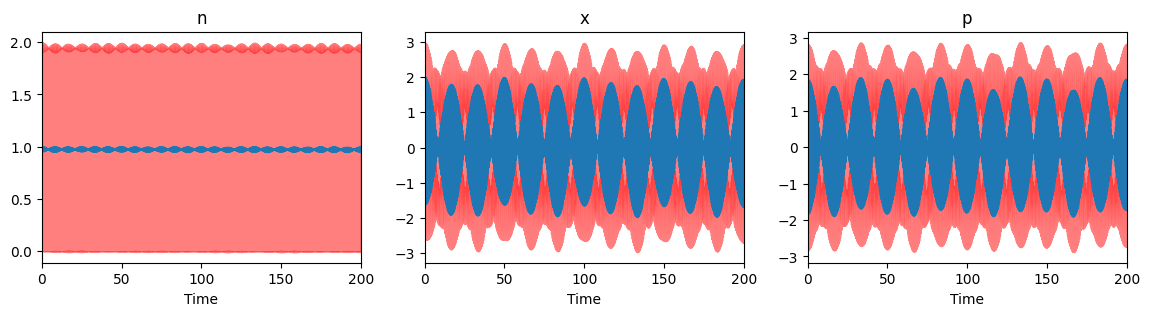

In [27]:
plot_expect_with_variance(N, [na1, x1, p1], [r'n', r'x', r'p'], result.states);

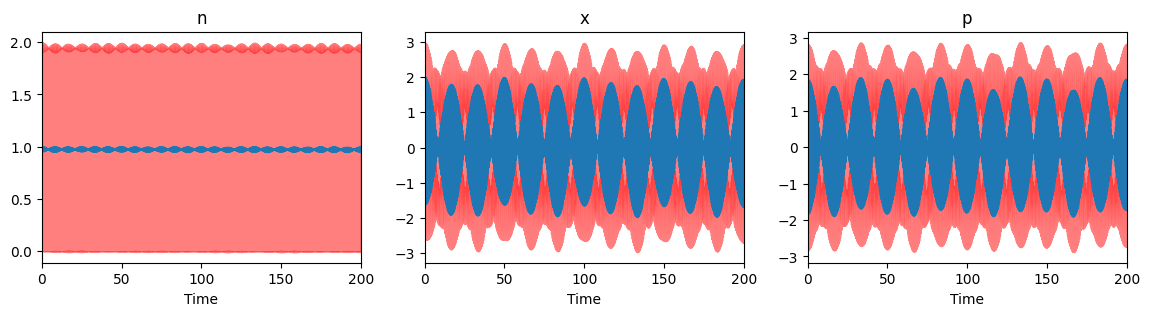

In [28]:
plot_expect_with_variance(N, [na2, x2, p2], [r'n', r'x', r'p'], result.states);

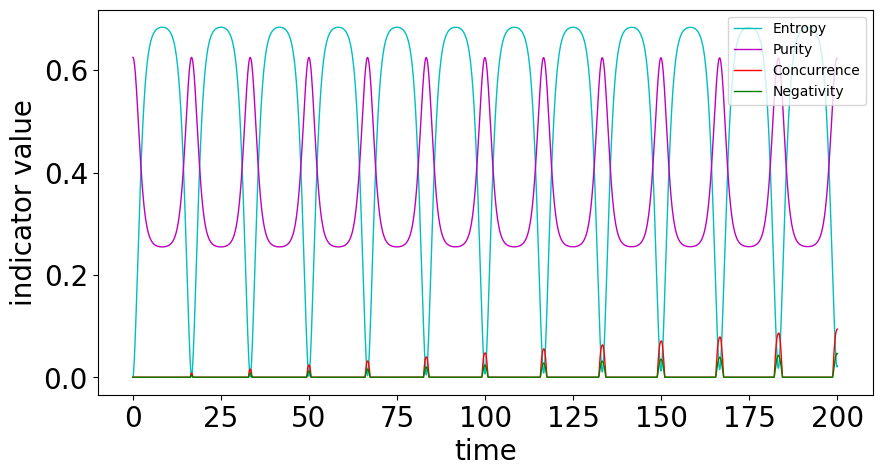

In [29]:
hfont = {'fontname':'DejaVu Sans'}
fig, axes = plt.subplots(1,1,figsize=(10, 5))

p = axes.plot(tlist, part_trace_entr, 'c', linewidth=1.0, label ='Entropy')
p = axes.plot(tlist, Purity, 'm', linewidth=1.0, label ='Purity')
p = axes.plot(tlist, Concurrence, 'r', linewidth=1.0, label ='Concurrence')
p = axes.plot(tlist, Negativity, 'g', linewidth=1.0, label ='Negativity')

#p = axes.plot(tlist, part_trace_entr, 'c--', linewidth=3.0, label ='Dissipative Entropy')
#p = axes.plot(tlist, Purity, 'm--', linewidth=3.0, label ='Dissipative Purity')
#p = axes.plot(tlist, Concurrence, 'r--', linewidth=3.0, label ='Dissipative Concurrence')

axes.set_xlabel(r'time', fontsize=20, **hfont)
axes.set_ylabel(r'indicator value', fontsize=20, **hfont)
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)
#xmin, xmax = axes.get_xlim()
#axes.set_xticks(np.round(np.linspace(0, time_steps, 5), 2))
#axes.set_yticks(np.round(np.linspace(0, 0.6, 4), 2))
#axes.set_xlim(0.0,time_steps)
axes.legend(loc = 'upper right')

The purity of a normalized quantum state satisfies $\frac{1}{d} \leq \gamma \leq 1$, where $d$, is the dimension of the Hilbert space upon which the state is defined. 

In [538]:
print('Maximum Entropy: ',max(part_trace_entr))  #completely entangled state ln2 = 0.693
print('Minimal Purity: ' , min(Purity))          #completely mixed state 0.25
print('Maximum Concurrence: ',max(Concurrence))  #completely faithful state 1
print('Maximum Negativity: ',max(Negativity))    #completely entangled (negative) state 1/2

Maximum Entropy:  0.6839059050683907
Minimal Purity:  0.25464712720147203
Maximum Concurrence:  0.09404047971049848
Maximum Negativity:  0.04655880062969201


The basic motivation behind defining "Concurrence" is its faithful quantification of quantum entanglement and hence also is useful as a strong separability criterion. "Faithful" means that Concurrence = 0 <=> Unentangled/Separable state, and if Concurrence is non-zero then it would "quantify" how much far these states are from achieving separability well. 

https://en.wikipedia.org/wiki/Concurrence_(quantum_computing)

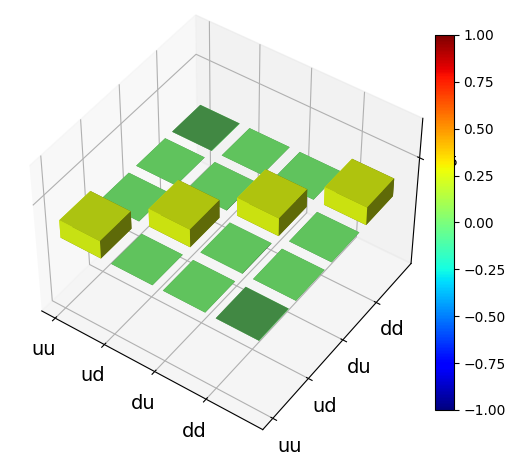

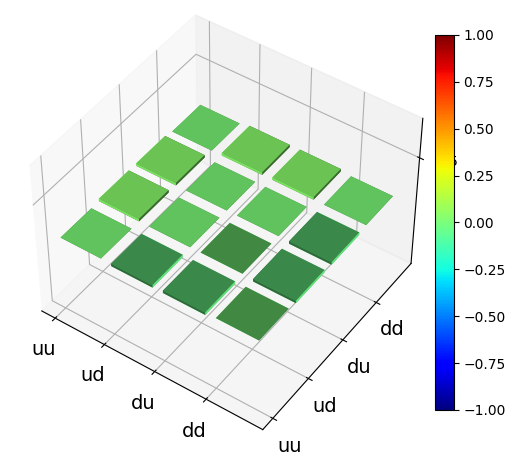

Entropy:  0.6838970795799624
Purity:  0.2546544274874677
Concurrence:  0
Negativity:  0.0


In [543]:
rho = result.states[250].ptrace(2)
matrix_visualize(real(rho))
matrix_visualize(imag(rho))
print('Entropy: ', Partial_Entropy_M(rho.full()))  #completely entangled state ln2 = 0.693
print('Purity: ' , purity_dicke(rho.full()))          #completely mixed state 0.25
print('Concurrence: ', concurrence(Qobj(rho.full(),dims = [[2, 2], [2, 2]])))  #completely faithful state 1
print('Negativity: ', negativity(Qobj(rho.full(),dims = [[2, 2], [2, 2]]), 1, method='eigenvalues', logarithmic=False)) 

Evolution of the expectation values of the $\sigma_x$ and $\sigma_z$ operators

In [292]:
qubits = tensor((basis(2,0)+basis(2,1)).unit(),(basis(2,0)+basis(2,1)).unit())
psi0 = tensor(coherent(N, 0), coherent(N, 0), qubits)
e_ops = [sx1, sz1, sx2, sz2]
result = mesolve(H, psi0, tlist, [], e_ops)

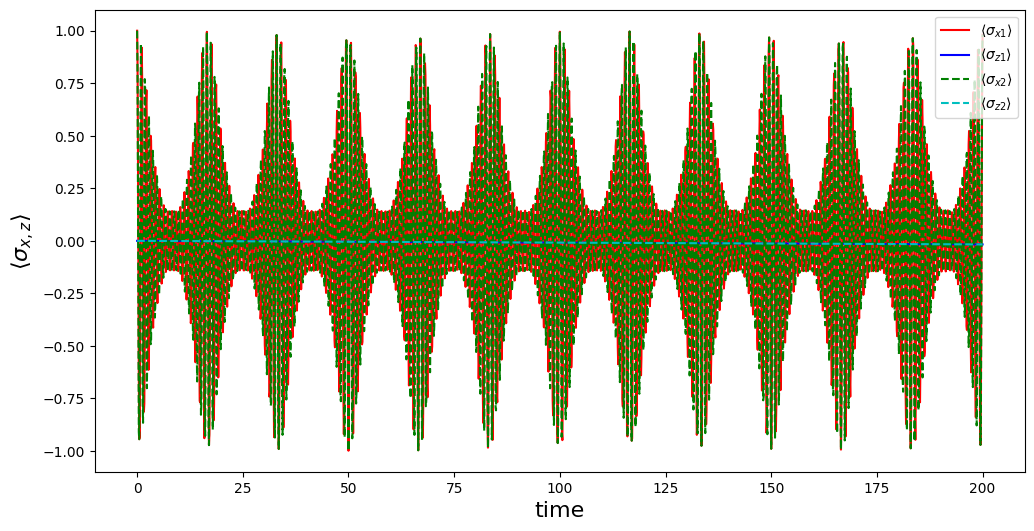

In [293]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(result.times, result.expect[0], 'r', label=r'$\langle\sigma_{x1}\rangle$')
ax.plot(result.times, result.expect[1], 'b', label=r'$\langle\sigma_{z1}\rangle$')

ax.plot(result.times, result.expect[2], 'g--', label=r'$\langle\sigma_{x2}\rangle$')
ax.plot(result.times, result.expect[3], 'c--', label=r'$\langle\sigma_{z2}\rangle$')


ax.set_ylabel(r'$\langle\sigma_{x,z}\rangle$', fontsize=16)
ax.set_xlabel("time", fontsize=16)
ax.legend()
# ax.set_ylim(-1, 1)
# ax.set_xlim(result.times[0], result.times[-1])

# Cavities exploration

Expectation values and standard deviations

In [574]:
na_e = zeros(shape(tlist))
na_s = zeros(shape(tlist))
nb_e = zeros(shape(tlist))
nb_s = zeros(shape(tlist))

for idx, psi in enumerate(result.states):
    na_e[idx] = expect(nc1, psi)
    na_s[idx] = expect(nc1*nc1, psi)
    nb_e[idx] = expect(nc2, psi)
    nb_s[idx] = expect(nc2*nc2, psi)

# substract the average squared to obtain variances
na_s = na_s - na_e ** 2
nb_s = nb_s - nb_e ** 2

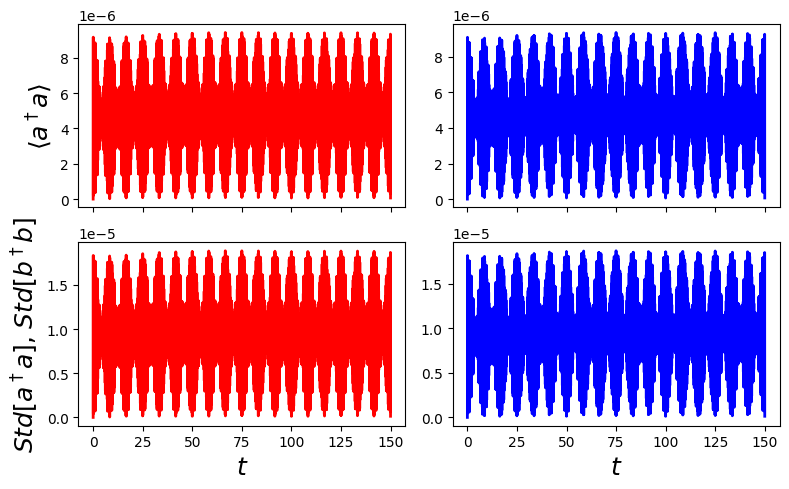

In [575]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(8,5))

line1 = axes[0,0].plot(tlist, na_e, 'r', linewidth=2)
axes[0,0].set_ylabel(r'$\langle a^\dagger a \rangle$', fontsize=18)

line2 = axes[0,1].plot(tlist, nb_e, 'b', linewidth=2)

line3 = axes[1,0].plot(tlist, na_s, 'r', linewidth=2)
axes[1,0].set_xlabel('$t$', fontsize=18)
axes[1,0].set_ylabel(r'$Std[a^\dagger a]$, $Std[b^\dagger b]$', fontsize=18)

line4 = axes[1,1].plot(tlist, nb_s, 'b', linewidth=2)
axes[1,1].set_xlabel('$t$', fontsize=18)

fig.tight_layout()

# Nonclassical correlations for the cavitie fields

In [576]:
# second-order photon correlations
g2_1  = zeros(shape(tlist))
g2_2  = zeros(shape(tlist))
g2_12 = zeros(shape(tlist))

ad_ad_a_a = a1.dag() * a1.dag() * a1 * a1
bd_bd_b_b = a2.dag() * a2.dag() * a2 * a2
ad_a_bd_b = a1.dag() * a1 * a2.dag() * a2

cs_rhs = zeros(shape(tlist))
cs_lhs = zeros(shape(tlist))

for idx, psi in enumerate(result.states):
    # g2 correlations
    g2_1[idx]  = expect(ad_ad_a_a, psi)
    g2_2[idx]  = expect(bd_bd_b_b, psi)
    g2_12[idx] = expect(ad_a_bd_b, psi)
    
    # cauchy-schwarz 
    cs_lhs[idx] = expect(ad_a_bd_b, psi)
    cs_rhs[idx] = expect(ad_ad_a_a, psi)
    
# normalize the correlation functions
g2_1  = g2_1  / (na_e ** 2)
g2_2  = g2_2  / (nb_e ** 2)
g2_12 = g2_12 / (na_e * nb_e)

<ipython-input-576-4bef5a7f1b4a>:24: RuntimeWarning: invalid value encountered in true_divide
  g2_1  = g2_1  / (na_e ** 2)
<ipython-input-576-4bef5a7f1b4a>:25: RuntimeWarning: invalid value encountered in true_divide
  g2_2  = g2_2  / (nb_e ** 2)
<ipython-input-576-4bef5a7f1b4a>:26: RuntimeWarning: invalid value encountered in true_divide
  g2_12 = g2_12 / (na_e * nb_e)


### Second-order coherence functions: Cauchy-Schwarz inequality

Walls and Milburn, page 78: Classical states satisfy

$[g_{12}^{(2)}]^2 \leq g_{1}^{(2)}g_{2}^{(2)}$

(variant of the Cauchy-Schwarz inequality)

Text(0, 0.5, '$|g_{12}^{(2)}(t)|^2$')

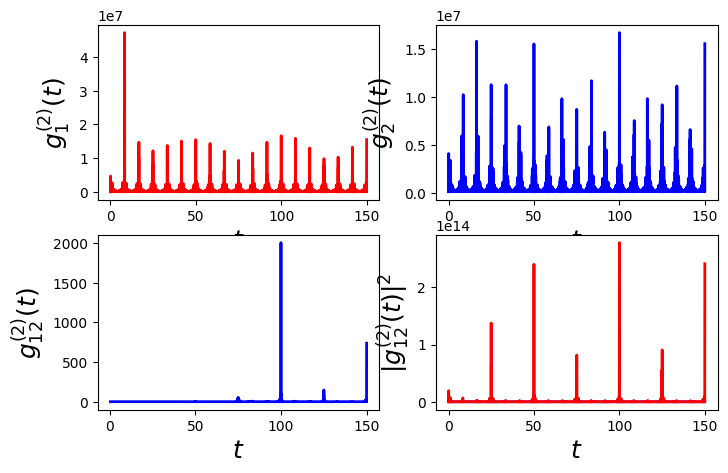

In [577]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))

line1 = axes[0,0].plot(tlist, g2_1, 'r', linewidth=2)
axes[0,0].set_xlabel("$t$", fontsize=18)
axes[0,0].set_ylabel(r'$g_1^{(2)}(t)$', fontsize=18)
#axes[0,0].set_ylim(0,3)

line2 = axes[0,1].plot(tlist, g2_2, 'b', linewidth=2)
axes[0,1].set_xlabel("$t$", fontsize=18)
axes[0,1].set_ylabel(r'$g_2^{(2)}(t)$', fontsize=18)
#axes[0,1].set_ylim(0,3)

line3 = axes[1,0].plot(tlist[10:], g2_12[10:], 'b', linewidth=2)
axes[1,0].set_xlabel("$t$", fontsize=18)
axes[1,0].set_ylabel(r'$g_{12}^{(2)}(t)$', fontsize=18)


line4 = axes[1,1].plot(tlist[20:], abs(g2_12[20:])**2, 'b', linewidth=2)
line5 = axes[1,1].plot(tlist, g2_1 * g2_2, 'r', linewidth=2)
axes[1,1].set_xlabel("$t$", fontsize=18)
axes[1,1].set_ylabel(r'$|g_{12}^{(2)}(t)|^2$', fontsize=18)

#fig.tight_layout()

# Wigner functions

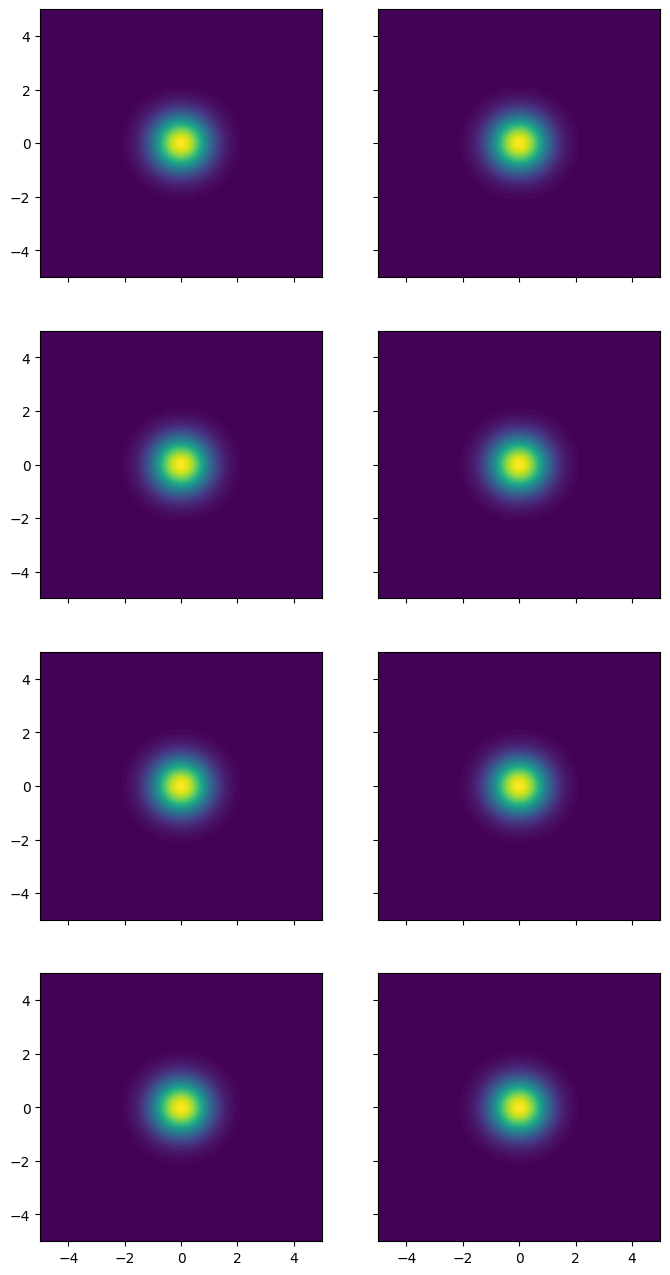

In [578]:
# pick an arbitrary time and calculate the wigner functions for each mode
xvec = np.linspace(-5,5,200)
t_idx_vec = [0, 1000, 2000, 3000]

fig, axes = plt.subplots(len(t_idx_vec), 2, sharex=True, sharey=True, figsize=(8,4*len(t_idx_vec)))

for idx, t_idx in enumerate(t_idx_vec):
    psi_a = ptrace(result.states[t_idx], 0)
    psi_b = ptrace(result.states[t_idx], 1)
    W_a = wigner(psi_a, xvec, xvec)
    W_b = wigner(psi_b, xvec, xvec)
    
    cont1 = axes[idx,0].contourf(xvec, xvec, W_a, 100)
    cont2 = axes[idx,1].contourf(xvec, xvec, W_b, 100)

# Fock-state distribution

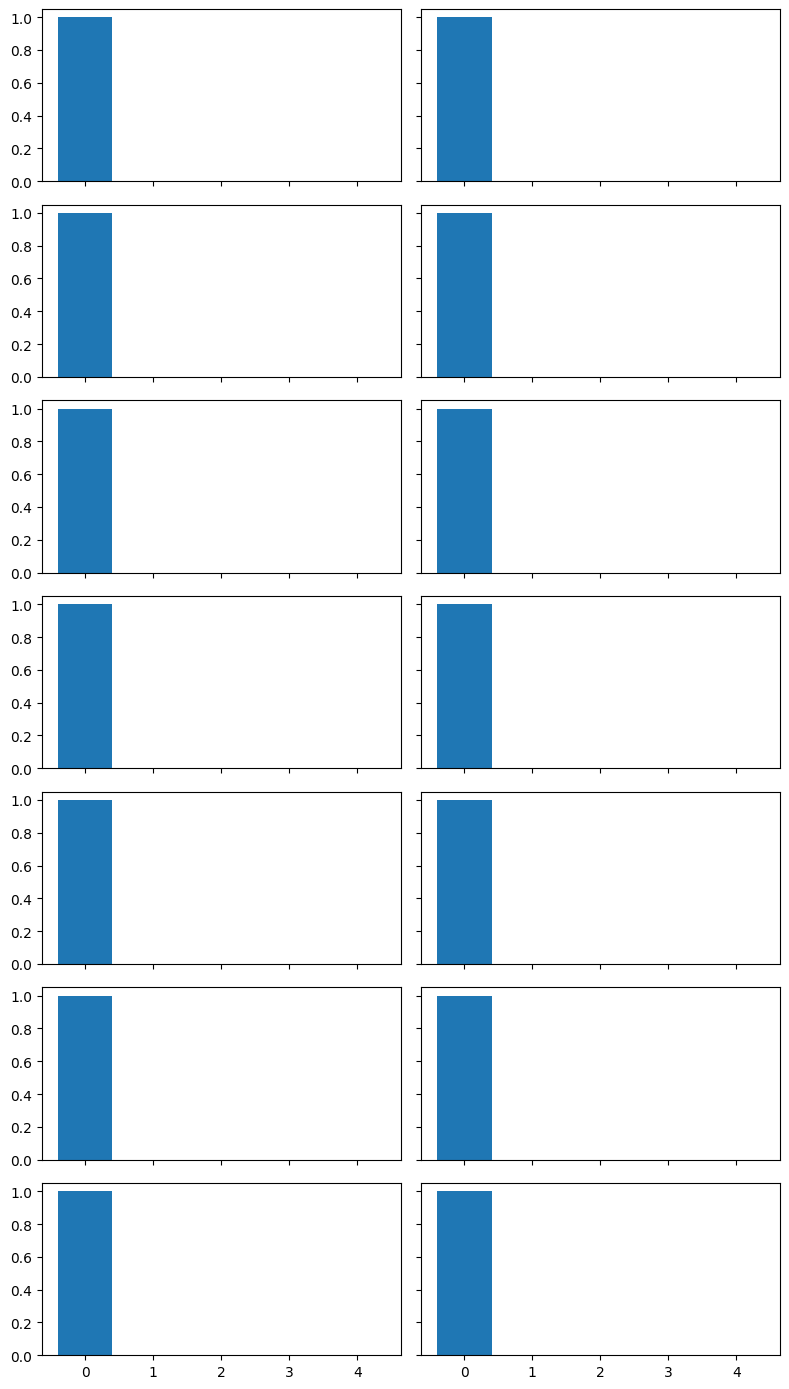

In [579]:
# pick arbitrary times and plot the photon distributions at those times
#t_idx_vec = [0, 1000, 2000, 3000]
t_idx_vec = range(0,len(tlist),500) 

fig, axes = plt.subplots(len(t_idx_vec), 2, sharex=True, sharey=True, figsize=(8,2*len(t_idx_vec)))

for idx, t_idx in enumerate(t_idx_vec):
    psi_a = ptrace(result.states[t_idx], 0)
    psi_b = ptrace(result.states[t_idx], 1)
    
    cont1 = axes[idx,0].bar(range(0, N), real(psi_a.diag()))
    cont2 = axes[idx,1].bar(range(0, N), real(psi_b.diag()))
    
fig.tight_layout()

# Entanglement: logarithmic negativity

#### Wigner covariance matrix:

In order to evaluate the logarithmic negativity we first need to construct the Wigner covariance matrix:

$V_{ij} = \frac{1}{2}\langle R_iR_j+R_jR_i \rangle$

where 

$R^T = (q_1, p_1, q_2, p_2) = (q_a, p_a, q_b, p_b)$

is a vector with the quadratures for the two modes $a$ and $b$:

$q_a = e^{i\theta_a}a + e^{-i\theta_a}a^\dagger$ 

$p_a = -i(e^{i\theta_a}a - e^{-i\theta_a}a^\dagger)$

and likewise for mode $b$.

In [580]:
R_op = correlation_matrix_quadrature(a1, a2)

In [581]:
def plot_covariance_matrix(V, ax):
    """
    Plot a matrix-histogram representation of the supplied Wigner covariance matrix.
    """
    num_elem = 16
    xpos,ypos = meshgrid(range(4),range(4))
    xpos = xpos.T.flatten()-0.5 
    ypos = ypos.T.flatten()-0.5 
    zpos = zeros(num_elem)   
    dx = 0.75 * np.ones(num_elem) 
    dy = dx.copy()           
    dz = V.flatten()

    nrm = mpl.colors.Normalize(-0.5,0.5) 
    colors = cm.jet(nrm((np.sign(dz)*abs(dz)**0.75))) 
    
    ax.view_init(azim=-40,elev=60)
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)
    ax.axes.w_xaxis.set_major_locator(plt.IndexLocator(1,-0.5))
    ax.axes.w_yaxis.set_major_locator(plt.IndexLocator(1,-0.5))
    ax.axes.w_xaxis.set_ticklabels(("$q_-$", "$p_-$", "$q_+$", "$p_+$"), fontsize=20)
    ax.axes.w_yaxis.set_ticklabels(("$q_-$", "$p_-$", "$q_+$", "$p_+$"), fontsize=20)

<ipython-input-581-a341c0d3a02d>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.axes.w_xaxis.set_ticklabels(("$q_-$", "$p_-$", "$q_+$", "$p_+$"), fontsize=20)
<ipython-input-581-a341c0d3a02d>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.axes.w_yaxis.set_ticklabels(("$q_-$", "$p_-$", "$q_+$", "$p_+$"), fontsize=20)
<ipython-input-582-15822013ea9a>:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


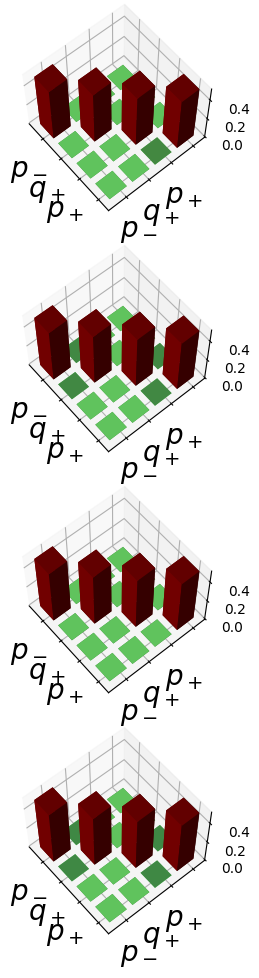

In [582]:
# pick arbitrary times and plot the photon distributions at those times
t_idx_vec = [0, 1000, 2000, 3000]

fig, axes = plt.subplots(len(t_idx_vec), 1, subplot_kw={'projection':'3d'}, figsize=(6,3*len(t_idx_vec)))

for idx, t_idx in enumerate(t_idx_vec):
    
    # calculate the wigner covariance matrix
    V = wigner_covariance_matrix(R=R_op, rho=result.states[idx])

    plot_covariance_matrix(V, axes[idx])
    
fig.tight_layout()

C:\Users\Kirill\Anaconda3\lib\site-packages\qutip\continuous_variables.py:286: RuntimeWarning: invalid value encountered in sqrt
  nu_ = sigma / 2 - np.sqrt(sigma ** 2 - 4 * np.linalg.det(V)) / 2


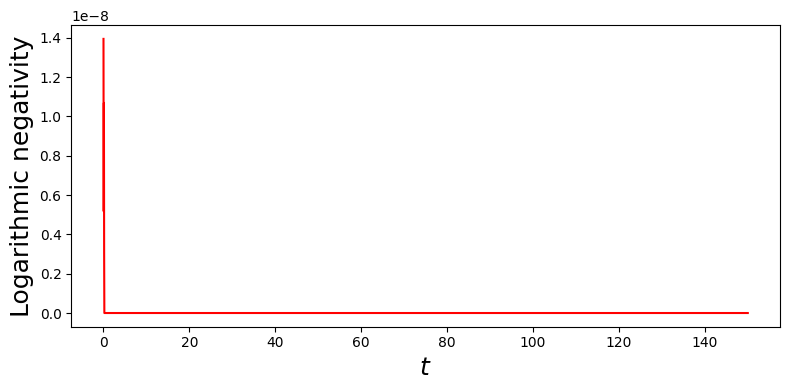

In [583]:
"""
Calculate the wigner covariance matrix logarithmic negativity for each time step
"""
logneg = np.zeros(shape(tlist))

for idx, t_idx in enumerate(tlist):
    
    V = wigner_covariance_matrix(R=R_op, rho=result.states[idx])
    
    logneg[idx] = logarithmic_negativity(V)
    
fig, axes = plt.subplots(1, 1, figsize=(8,4))
axes.plot(tlist, logneg, 'r')
axes.set_xlabel("$t$", fontsize=18)
axes.set_ylabel("Logarithmic negativity", fontsize=18)
fig.tight_layout()

# Animation of the Density matrix

In [ ]:
figures = []
for i in arange(0,size(tlist)):
    name = 'Entropy:',np.round(part_trace_entr[i],3),'Concurrence:',np.round(Concurrence[i],3),'Purity:',np.round(Purity[i],3)
    #fig = matrix_histogram_complex(result.states[i].ptrace(2).full(), xlabels, xlabels, limits = [-0.0,0.3])[0]
    #fig.savefig("density_matricies/file%02d.png" % i, bbox_inches="tight")
    fig1 = matrix_histogram(real(result.states[i].ptrace(2).full()), xlabels, xlabels, limits = [-0.3,0.5], title = name)[0]
    fig1.savefig("density_matricies_real/file%02d.png" % i, bbox_inches="tight")
    fig2 = matrix_histogram(imag(result.states[i].ptrace(2).full()), xlabels, xlabels, limits = [-0.5,0.5], title = name)[0]
    fig2.savefig("density_matricies_imag/file%02d.png" % i, bbox_inches="tight")

In [ ]:
for i in arange(0,size(tlist)):
    
    #Read the two images
    image1 = Image.open('density_matricies_real/file%02d.png' % i)
    #image1.show()
    image2 = Image.open('density_matricies_imag/file%02d.png' % i)
    #image2.show()
    #resize, first image
    #image1 = image1.resize((250, 240))
    image1_size = image1.size
    image2_size = image2.size
    new_image = Image.new('RGB',(2*image1_size[0], image1_size[1]))
    new_image.paste(image1,(0,0))
    new_image.paste(image2,(image1_size[0],0))
    new_image.save("density_matricies_merged/file%02d.png" % i,"JPEG")
    #new_image.show()

In [ ]:
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [ ]:
img_array = []
for filename in sorted(glob.glob('C:/notebooks/squeezed electrons/density_matricies_merged/*.png'), key = numericalSort):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('Density_matrix_2q_0photons_diss.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [ ]:
#display_embedded_video("Density_matrix_anim.mp4")
#display_embedded_video("Density_matrix_2q_0photons.mp4")
display_embedded_video("Density_matrix_2q_0photons_diss)

#  3 qubits

In [528]:
N = 10

# operators: 
#the annihilation operator of the first resonator
a1 = tensor(destroy(N), qeye(N), qeye(N), qeye(4), qeye(2))
nc1 = a1.dag() * a1
xc1 = a1 + a1.dag()

#the annihilation operator of the second resonator
a2 = tensor(qeye(N), destroy(N), qeye(N), qeye(4), qeye(2))
nc2 = a2.dag() * a2
xc2 = a2 + a2.dag()

#the annihilation operator of the third resonator
a3 = tensor(qeye(N), qeye(N), destroy(N), qeye(4), qeye(2))
nc3 = a3.dag() * a3
xc3 = a3 + a3.dag()

# first qubit operators
sm1 = tensor(qeye(N), qeye(N), qeye(N), Qobj(kron(destroy(2),qeye(2))), qeye(2))
sz1 = tensor(qeye(N), qeye(N), qeye(N), Qobj(kron(sigmaz(),  qeye(2))), qeye(2))
sx1 = tensor(qeye(N), qeye(N), qeye(N), Qobj(kron(sigmax(),  qeye(2))), qeye(2))
nq1 = sm1.dag() * sm1
xq1 = sm1 + sm1.dag()

# second qubit operators
sm2 = tensor(qeye(N), qeye(N), qeye(N), Qobj(kron(qeye(2), destroy(2))),qeye(2))
sz2 = tensor(qeye(N), qeye(N), qeye(N), Qobj(kron(qeye(2), sigmaz())),  qeye(2))
sx2 = tensor(qeye(N), qeye(N), qeye(N), Qobj(kron(qeye(2), sigmax())),  qeye(2))
nq2 = sm2.dag() * sm2
xq2 = sm2 + sm2.dag()

# third qubit operators
sm3 = tensor(qeye(N), qeye(N), qeye(N), Qobj(kron(qeye(2), qeye(2))),destroy(2))
sz3 = tensor(qeye(N), qeye(N), qeye(N), Qobj(kron(qeye(2), qeye(2))), sigmaz())
sx3 = tensor(qeye(N), qeye(N), qeye(N), Qobj(kron(qeye(2), qeye(2))), sigmax())
nq3 = sm3.dag() * sm3
xq3 = sm3 + sm3.dag()

I = tensor(qeye(N), qeye(N), qeye(N), Qobj(kron(qeye(2),qeye(2))), qeye(2))

# and we'll also need the following operators in calculation of
# expectation values when visualizing the dynamics 

n  = num(N)
x1 = a1 + a1.dag()
p1 = -1j * (a1 - a1.dag())
x2 = a2 + a2.dag()
p2 = -1j * (a2 - a2.dag())
x3 = a3 + a3.dag()
p3 = -1j * (a3 - a3.dag())

In [529]:
g1 = 0.002        # relaxation rate
g2 = 0.001        # dephasing rate
n_th = 0.1        # bath temperature

##----------------------------------------------------

c_ops = []
c_ops.append(np.sqrt(g1 * (1+n_th)) * sm1)
c_ops.append(np.sqrt(g1 * n_th) * sm1.trans().conj())
c_ops.append(np.sqrt(g2) * sz1)
c_ops.append(np.sqrt(g1 * (1+n_th)) * sm2)
c_ops.append(np.sqrt(g1 * n_th) * sm2.trans().conj())
c_ops.append(np.sqrt(g2) * sz2)
c_ops.append(np.sqrt(g1 * (1+n_th)) * sm3)
c_ops.append(np.sqrt(g1 * n_th) * sm3.trans().conj())
c_ops.append(np.sqrt(g2) * sz3)

In [530]:
#delta1 = 0.05 * 2 * np.pi
#delta2 = 0.15 * 2 * np.pi

wr1 = 6.01 * 2 * np.pi                      # oscillator1 frequency in [GHz]
wr2 = 6.02 * 2 * np.pi                      # oscillator2 frequency in [GHz]
wr3 = 6.03 * 2 * np.pi                      # oscillator2 frequency in [GHz]

wq1  = 139.5 * 2 * np.pi                    # qubit frequency in [GHz]
wq2  = 140.0 * 2 * np.pi                    # qubit frequency in [GHz]
wq3  = 140.5 * 2 * np.pi                    # qubit frequency in [GHz]
chi  = 0.1 * 2 * np.pi                      # dispercive shift in [GHz]

pump =  0.1                                 # Pumping of the system  

tlist = linspace(0, 10, 1001)   # time

In [531]:
a = tensor(destroy(N), destroy(N), Qobj(kron(qeye(2), qeye(2))))

In [532]:
H = wr1 * (a1.dag() * a1 + I/2.0) + (wq1 / 2.0) * sz1 + chi * (a1.dag() * a1 + I/2) * sz1 +\
    wr2 * (a2.dag() * a2 + I/2.0) + (wq2 / 2.0) * sz2 + chi * (a2.dag() * a2 + I/2) * sz2 +\
    wr3 * (a3.dag() * a3 + I/2.0) + (wq3 / 2.0) * sz3 + chi * (a3.dag() * a3 + I/2) * sz3  \
    - 0.5*pump*(a1.dag()*a1.dag() + a1*a1) - 0.5*pump*(a2.dag()*a2.dag() + a2*a2) - 0.5*pump*(a3.dag()*a3.dag() + a3*a3)

In [533]:
qubits = Qobj(kron((basis(2,0)+basis(2,1)).unit(),(basis(2,0)+basis(2,1)).unit()))

psi0 = tensor(coherent(N, 0), coherent(N, 0), coherent(N, 0), qubits ,(basis(2,0)+basis(2,1)).unit())

In [534]:
result = mesolve(H, psi0, tlist, [], [])
part_trace_entr = []
Purity = []
Concurrence = []
for i in result.states:
    part_trace_entr.append(Partial_Entropy_M(i.ptrace(3).full()))
    Purity.append(purity_dicke(i.ptrace(3).full()))
    Concurrence.append(concurrence(Qobj(i.ptrace(3).full(),dims = [[2, 2], [2, 2]])))

In [390]:
#for i in np.array([0, 150, 250, 500, 750, 1000]):
#    print('Entropy',np.round(part_trace_entr[i],3),'\n',matrix_chop(result.states[i].ptrace(3).full()), '\n')

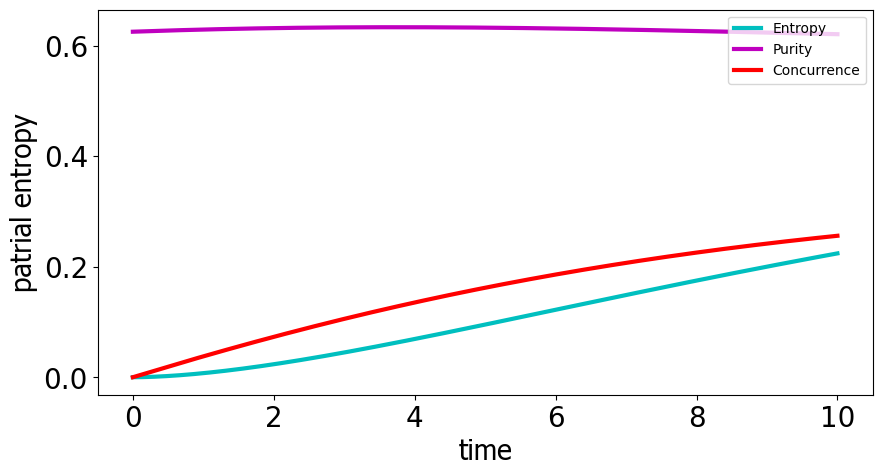

In [535]:
hfont = {'fontname':'Tahoma'}
fig, axes = plt.subplots(1,1,figsize=(10, 5))

p = axes.plot(tlist, part_trace_entr, 'c', linewidth=3.0, label ='Entropy')
p = axes.plot(tlist, Purity, 'm', linewidth=3.0, label ='Purity')
p = axes.plot(tlist, Concurrence, 'r', linewidth=3.0, label ='Concurrence')

axes.set_xlabel(r'time', fontsize=20, **hfont)
axes.set_ylabel(r'patrial entropy', fontsize=20, **hfont)
axes.tick_params(axis='x', labelsize=20)
axes.tick_params(axis='y', labelsize=20)
#xmin, xmax = axes.get_xlim()
#axes.set_xticks(np.round(np.linspace(0, time_steps, 5), 2))
#axes.set_yticks(np.round(np.linspace(0, 0.6, 4), 2))
#axes.set_xlim(0.0,time_steps)
axes.legend(loc = 'upper right')

In [97]:
mask = [idx == 0 for idx, n in enumerate(rho.dims[0])]

In [98]:
rho_pt = partial_transpose(rho, mask)

In [99]:
rho_pt

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.  0.  0.  0.5]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.5 0.  0.  0. ]]

# Bell State

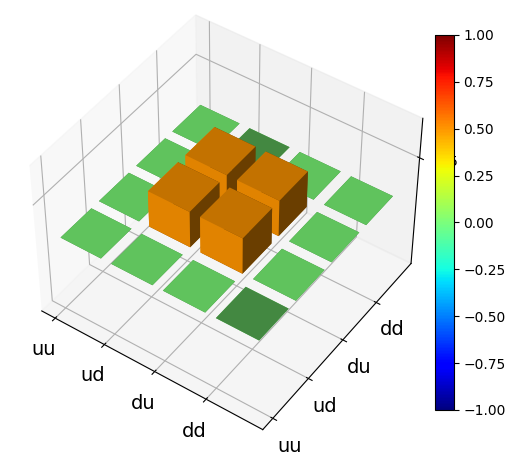

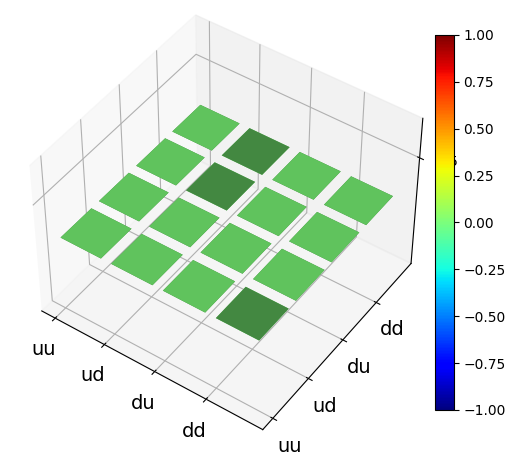

Entropy:  0.6931471805599454
Purity:  0.9999999999999996
Concurrence:  0.9999999999999998
Negativity:  0.4999999999999999


In [100]:
state = '10'
rho = bell_state(state)*bell_state(state).dag()
matrix_visualize(real(rho))
matrix_visualize(imag(rho))
print('Entropy: ',Partial_Entropy_M(rho.full()))  #completely entangled state ln2 = 0.693
print('Purity: ' , purity_dicke(rho))          #completely mixed state 0.25
print('Concurrence: ',concurrence(rho))  #completely faithful state 1
print('Negativity: ',negativity(rho, 1, method='eigenvalues', logarithmic=False)) 

# Software versions:

In [470]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.6.2
Numpy,1.21.6
SciPy,1.6.2
matplotlib,3.5.3
Cython,0.29.23
Number of CPUs,8
BLAS Info,OPENBLAS
IPython,8.4.0
Python,"3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]"
OS,nt [win32]
